## Ex1: Participant Exercise

1. Download the daily stock price of four or five randomly selected stocks. The stocks can belong to one sector.

2. Find out the value at risk (Var) of each stock at 95%.

3. Plot the daily gain or loss of all the stocks in one plot.

4. Find out the probability of making 4% gain in each of the stock.

<ipython-input-1-f0fdfcbe7a6a>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bpcl_df["gain"] = ((bpcl_df['Close Price'] - bpcl_df['Open Price']) * 100 / bpcl_df['Open Price'])
<ipython-input-1-f0fdfcbe7a6a>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hul_df["gain"] = ((hul_df['Close Price'] - hul_df['Open Price']) * 100 / hul_df['Open Price'])
<ipython-input-1-f0fdfcbe7a6a>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

CI 95%:
	BPCL (-2.52639368787559, 2.665258051162966)
	 HUL (-2.1788530655691702, 2.1796085573386708)
	 RIL (-2.523217517402677, 2.2877623410961023)
	 HPCL (-3.1780897171091986, 3.361878962456645)
	 IOCL (-2.306458634122999, 2.4478916823906283)
VaR:
	 BPCL -2526.39368787559
	 RIL -2523.217517402677
	 HUL -2178.85306556917
	 HPCL -3178.089717109199
	 IOCL -2306.4586341229992
Probability of making 4% gain in each stock
	BPCL 0.001
	RIL 0.000 
	HUL 0.000
	HPCL 0.010
	IOCL 0.001


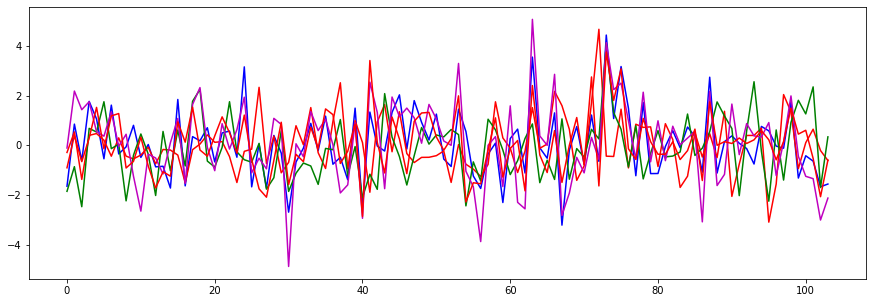

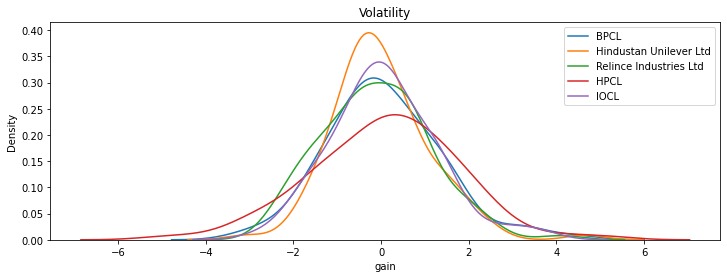

In [1]:
# Downloaded CSV files with date range: 20221013 to 20230313
# 500547_bpcl.csv
# 500696_hul.csv
# 500325_ril.csv
# 500104_hpcl.csv
# 530965_iocl.csv

import pandas as pd
import matplotlib as mplot
import matplotlib.pyplot as plt
import seaborn as sn
from   scipy import stats

# Read the CSV files
bpcl_df = pd.read_csv('https://raw.githubusercontent.com/jnarin/MLCourse_assignments/main/resources/500547_bpcl.csv', parse_dates=['Date'])
hul_df  = pd.read_csv('https://raw.githubusercontent.com/jnarin/MLCourse_assignments/main/resources/500696_hul.csv',  parse_dates=['Date'])
ril_df  = pd.read_csv('https://raw.githubusercontent.com/jnarin/MLCourse_assignments/main/resources/500325_ril.csv',  parse_dates=['Date'])
hpcl_df = pd.read_csv('https://raw.githubusercontent.com/jnarin/MLCourse_assignments/main/resources/500104_hpcl.csv', parse_dates=['Date'])
iocl_df = pd.read_csv('https://raw.githubusercontent.com/jnarin/MLCourse_assignments/main/resources/530965_iocl.csv', parse_dates=['Date'])


# Index data based on timestamp
bpcl_df.set_index(['Date'], drop=True)
hul_df.set_index(['Date'], drop=True)
ril_df.set_index(['Date'], drop=True)
hpcl_df.set_index(['Date'], drop=True)
iocl_df.set_index(['Date'], drop=True)

# Sort the data based on ascending order of timesamp
bpcl_df.sort_index(ascending=True, inplace=True)
hul_df.sort_index(ascending=True, inplace=True)
ril_df.sort_index(ascending=True, inplace=True)
hpcl_df.sort_index(ascending=True, inplace=True)
iocl_df.sort_index(ascending=True, inplace=True)

# Select Close price and Open price columns
bpcl_df = bpcl_df[['Close Price', 'Open Price']]
hul_df  = hul_df[['Close Price', 'Open Price']]
ril_df  = ril_df[['Close Price', 'Open Price']]
hpcl_df = hpcl_df[['Close Price', 'Open Price']]
iocl_df = iocl_df[['Close Price', 'Open Price']]


# Calculate daily gain
bpcl_df["gain"] = ((bpcl_df['Close Price'] - bpcl_df['Open Price']) * 100 / bpcl_df['Open Price'])
hul_df["gain"] = ((hul_df['Close Price'] - hul_df['Open Price']) * 100 / hul_df['Open Price'])
ril_df["gain"] = ((ril_df['Close Price'] - ril_df['Open Price']) * 100 / ril_df['Open Price'])
hpcl_df["gain"] = ((hpcl_df['Close Price'] - hpcl_df['Open Price']) * 100 / hpcl_df['Open Price'])
iocl_df["gain"] = ((iocl_df['Close Price'] - iocl_df['Open Price']) * 100 / iocl_df['Open Price'])

# Plot the gain chart
plt.figure(figsize = (15, 5))
plt.plot(bpcl_df.gain, 'b')
plt.plot(hul_df.gain, 'r')
plt.plot(ril_df.gain, 'g')
plt.plot(hpcl_df.gain, 'm')
plt.plot(iocl_df.gain, 'r')

# Histogram plot
plt.figure(figsize = (12, 4))
plt.title('Volatility')
sn.kdeplot(bpcl_df.gain, label = "BPCL")
sn.kdeplot(hul_df.gain, label = "Hindustan Unilever Ltd")
sn.kdeplot(ril_df.gain, label = "Relince Industries Ltd")
sn.kdeplot(hpcl_df.gain, label = "HPCL")
sn.kdeplot(iocl_df.gain, label = "IOCL")
plt.legend()

# Confidence Interval 95%
bpcl_ci_95 = stats.norm.interval(0.95, loc = bpcl_df.gain.mean(), scale=bpcl_df.gain.std())
hul_ci_95 = stats.norm.interval(0.95, loc = hul_df.gain.mean(), scale=hul_df.gain.std())
ril_ci_95 = stats.norm.interval(0.95, loc = ril_df.gain.mean(), scale=ril_df.gain.std())
hpcl_ci_95 = stats.norm.interval(0.95, loc = hpcl_df.gain.mean(), scale=hpcl_df.gain.std())
iocl_ci_95 = stats.norm.interval(0.95, loc = iocl_df.gain.mean(), scale=iocl_df.gain.std())

print(f"CI 95%:\n\tBPCL {bpcl_ci_95}\n\t HUL {hul_ci_95}\n\t RIL {ril_ci_95}\n\t HPCL {hpcl_ci_95}\n\t IOCL {iocl_ci_95}")

# Investment amount 1L, calculate VAR for 95% CI
invest_amt = 100000
bpcl_var = invest_amt * bpcl_ci_95[0] / 100
ril_var = invest_amt * ril_ci_95[0] / 100
hul_var = invest_amt * hul_ci_95[0] / 100
hpcl_var = invest_amt * hpcl_ci_95[0] / 100
iocl_var = invest_amt * iocl_ci_95[0] / 100

print(f"VaR:\n\t BPCL {bpcl_var}\n\t RIL {ril_var}\n\t HUL {hul_var}\n\t HPCL {hpcl_var}\n\t IOCL {iocl_var}")

# CDF @ 4%
bpcl_cdf = 1 - stats.norm.cdf(4.0, loc=bpcl_df.gain.mean(), scale = bpcl_df.gain.std())
ril_cdf = 1 - stats.norm.cdf(4.0, loc=ril_df.gain.mean(), scale = ril_df.gain.std())
hul_cdf = 1 - stats.norm.cdf(4.0, loc=hul_df.gain.mean(), scale = hul_df.gain.std())
hpcl_cdf = 1 - stats.norm.cdf(4.0, loc=hpcl_df.gain.mean(), scale = hpcl_df.gain.std())
iocl_cdf = 1 - stats.norm.cdf(4.0, loc=iocl_df.gain.mean(), scale = iocl_df.gain.std())

print("Probability of making 4% gain in each stock")
print(f"\tBPCL {bpcl_cdf:.3f}\n\tRIL {ril_cdf:.3f} \n\tHUL {hul_cdf:.3f}\n\tHPCL {hpcl_cdf:.3f}\n\tIOCL {iocl_cdf:.3f}")